# Match Analysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploration

In [52]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [53]:
matches.shape

(756, 14)

In [54]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only MI and CSK matches

In [55]:
CM =matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Mumbai Indians'))]

In [56]:
CM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk"
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium


In [57]:
CM.shape

(28, 14)

In [58]:
CM.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [59]:
CM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,28.0,14.535714,18.613978,0.0,0.0,3.5,24.25,60.0
win_by_wickets,28.0,2.714286,3.353905,0.0,0.0,0.0,6.00,9.0


## HEAD TO HEAD

Text(0.5, 1.0, 'CSK VS MI-head to head')

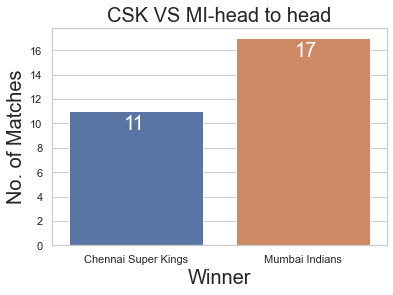

In [60]:
sns.countplot(CM["winner"])
plt.text(-0.07,9.5,str(CM['winner'].value_counts()['Chennai Super Kings']),size=20,color='white')
plt.text(0.95,15.5,str(CM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('CSK VS MI-head to head',fontsize = 20)

In [61]:
Season_wise_Match_Winner = pd.DataFrame(CM.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between CSK VS MI :")
Season_wise_Match_Winner

Season wise winner of matches between CSK VS MI :


winner count
season winner                           
2008   Chennai Super Kings             1
       Mumbai Indians                  1
2009   Chennai Super Kings             1
       Mumbai Indians                  1
2010   Chennai Super Kings             2
       Mumbai Indians                  1
2011   Mumbai Indians                  1
2012   Chennai Super Kings             1
       Mumbai Indians                  2
2013   Chennai Super Kings             1
       Mumbai Indians                  3
2014   Chennai Super Kings             3
2015   Chennai Super Kings             1
       Mumbai Indians                  3
2018   Chennai Super Kings             1
       Mumbai Indians                  1
2019   Mumbai Indians                  4

## Winning Percentage

In [62]:
Winning_Percentage = CM['winner'].value_counts()/len(CM['winner'])

In [63]:
print("MI winning percentage against CSK(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("CSK winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

MI winning percentage against CSK(overall) : 61%
CSK winning percentage against MI(overall) : 39%


## Performance Analysis

In [64]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [65]:
performance("Chennai Super Kings",CM)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  28.0
Average wickets by which a given team wins while chasing :  5.0


In [66]:
performance("Mumbai Indians",CM)

Number of times given team win while defending : 10
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  27.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [67]:
Toss_Decision = pd.DataFrame(CM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Chennai Super Kings bat                        5
                    field                      8
Mumbai Indians      bat                        8
                    field                      7

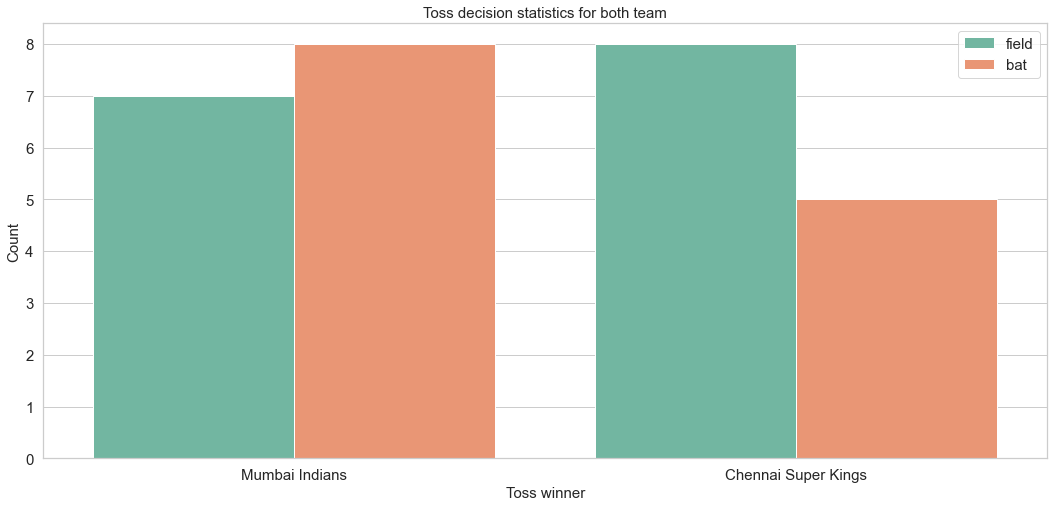

In [68]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(CM['toss_winner'],palette='Set2',hue=CM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

From the above analysis we can say that MI generally prefer to bat first and CSK prefer to chase the score.

In [69]:
Toss_Decision_based_Winner = pd.DataFrame(CM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Chennai Super Kings bat           Chennai Super Kings       3
                                  Mumbai Indians            2
                    field         Chennai Super Kings       3
                                  Mumbai Indians            5
Mumbai Indians      bat           Chennai Super Kings       3
                                  Mumbai Indians            5
                    field         Chennai Super Kings       2
                                  Mumbai Indians            5

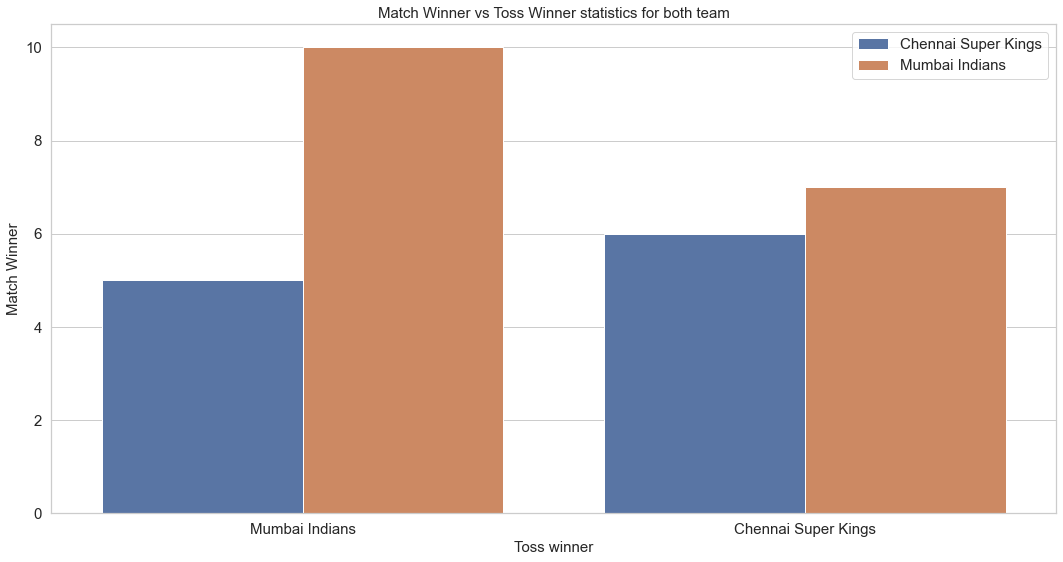

In [70]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CM['toss_winner'],hue=CM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [71]:
CSK = CM[CM["toss_winner"]=="Chennai Super Kings"]
MI = CM[CM["toss_winner"]=="Mumbai Indians"]

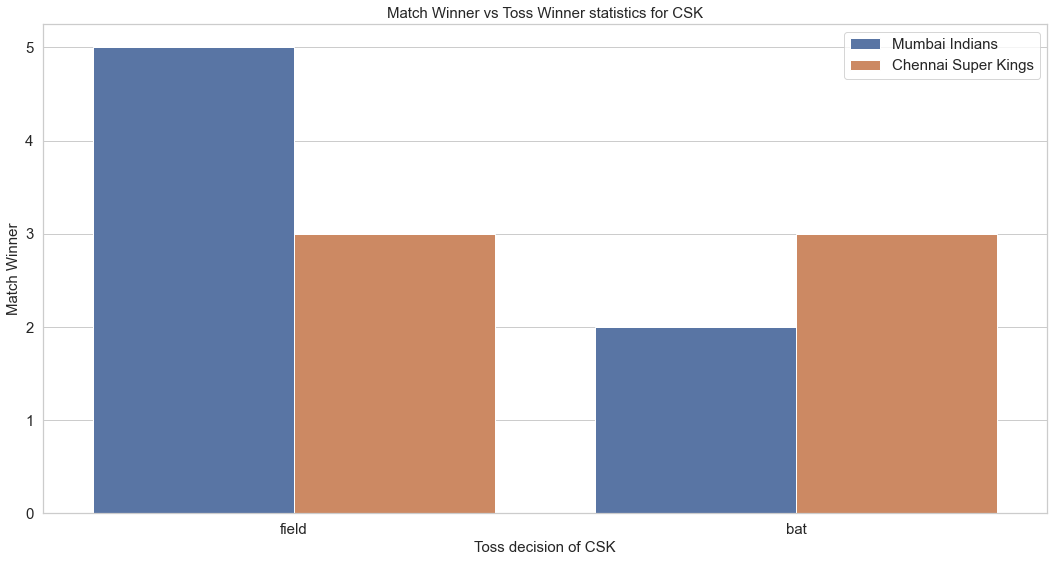

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CSK['toss_decision'],hue=CSK['winner'])
plt.title('Match Winner vs Toss Winner statistics for CSK',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of CSK',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

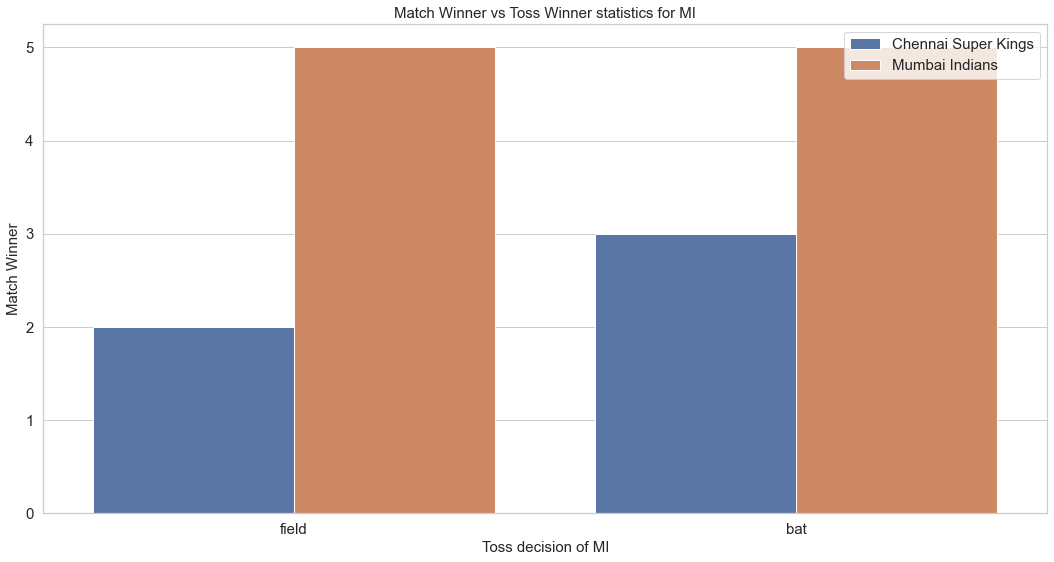

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [74]:
player_of_the_match = pd.DataFrame(CM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
RG Sharma,3
SK Raina,3
KA Pollard,3
SR Tendulkar,2
DR Smith,2
ML Hayden,2
HH Pandya,2
JJ Bumrah,1
A Nehra,1
MG Johnson,1


## Recent Year Performance Analysis

In [75]:
cond2 = CM["season"] == 2018
cond3 = CM["season"] == 2019
final = CM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium
7920,2018,Pune,28/04/18,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RG Sharma,Maharashtra Cricket Association Stadium
11151,2019,Mumbai,03/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,37,0,HH Pandya,Wankhede Stadium
11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium


In [76]:
final.shape

(6, 14)

In [77]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
RG Sharma,2
DJ Bravo,1
JJ Bumrah,1
HH Pandya,1
AS Yadav,1


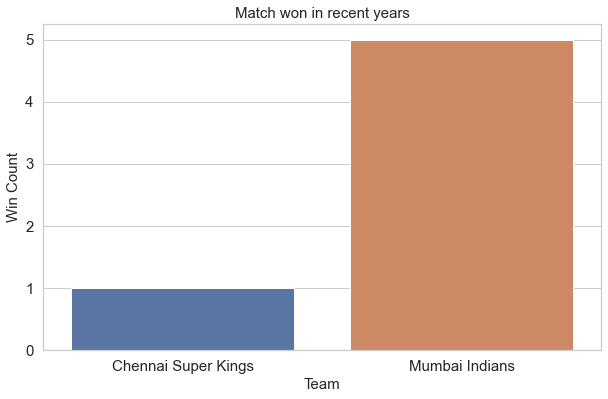

In [78]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to head to head , toss decision , win to loss ratio , performance analysis etc and also taking in consideration the present scenerio we can predict Mumbai Indians to be favorite for this match.  